## Observations and Insights 

In [21]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
Combined_Results = mouse_metadata.merge(study_results, on="Mouse ID")

# Display the data table for preview
Combined_Results.head(20)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [22]:
# Checking the number of mice.
len(Combined_Results["Mouse ID"].unique())



249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Duplicate_Mouse = Combined_Results.loc[Combined_Results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
Duplicate_Mouse


array(['g989'], dtype=object)

In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_df = Combined_Results[Combined_Results["Mouse ID"].isin(Duplicate_Mouse)==False]
Cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice in the clean DataFrame.
Check = len(Cleaned_df["Mouse ID"].unique())
Check

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
by_drug_mean = Cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
by_drug_mean

by_drug_median = Cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
by_drug_median

by_drug_var = Cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
by_drug_var

by_drug_sd = Cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
by_drug_sd

by_drug_SEM = Cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
by_drug_SEM

Summary_Statistics_Drugs = pd.DataFrame({
    "Mean": by_drug_mean,
    "Median": by_drug_median,
    "Variance": by_drug_var,
    "StandardDev": by_drug_sd,
    "SEM": by_drug_SEM    
})
Summary_Statistics_Drugs


,Mean,Median,Variance,StandardDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

<IPython.core.display.Javascript object>


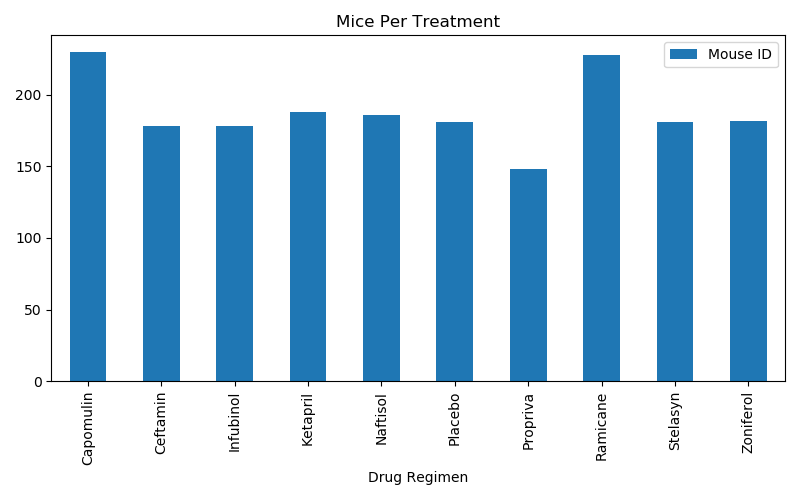

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_per_treatment = Cleaned_df[["Drug Regimen", "Mouse ID"]]
mice_per_treament_count = mice_per_treatment.groupby("Drug Regimen").count()["Mouse ID"]
mice_per_treament_count


Mice_per_treatment_df = pd.DataFrame({
    "Mouse ID" : mice_per_treament_count
})

Mice_per_treatment_df.plot(kind="bar", figsize=(8,5))

plt.title("Mice Per Treatment")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


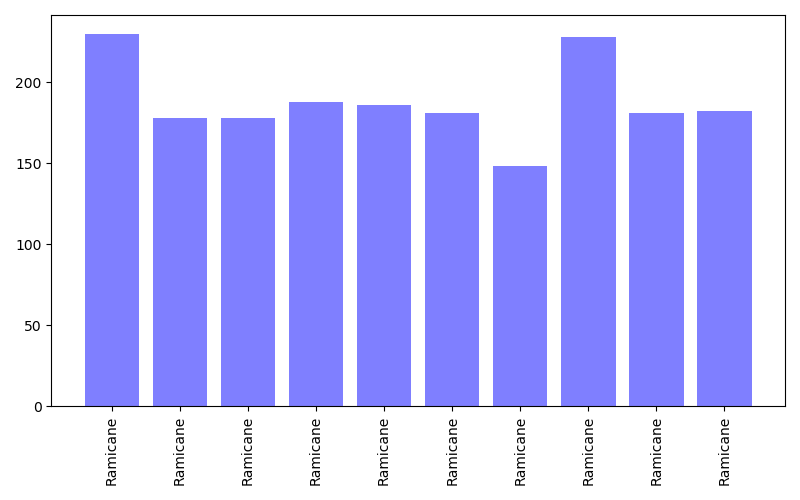

In [84]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(Mice_per_treatment_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8, 5))
plt.bar(x_axis, Mice_per_treatment_df["Mouse ID"], color='blue', alpha=0.5, align="center")
plt.xticks(tick_locations, Cleaned_df["Drug Regimen"], rotation="vertical")
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


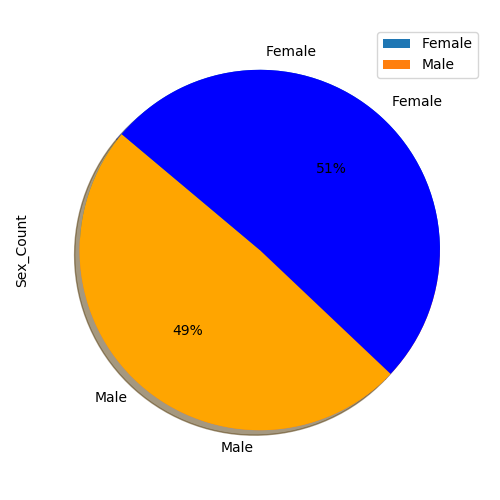

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Mice_Gender = Cleaned_df[["Mouse ID", "Sex"]]
Mice_Gender_count = Mice_Gender.groupby("Sex").count()["Mouse ID"]
Mice_Gender_count_df = pd.DataFrame({
    "Sex_Count": Mice_Gender_count
})

Mice_Gender_count_df.plot(kind = "pie", subplots = True, figsize = (5,5))
plt.tight_layout()
plt.savefig("Pie Chart 1")
plt.show()

#pie_gender = Cleaned_df["Sex"].value_counts().plot.pie()

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
number_of_each_gender = Mice_Gender_count_df["Sex_Count"]
colors = ["Orange", "Blue"]
plt.pie(number_of_each_gender, explode=None, labels=labels, colors=colors, autopct="%1.0f%%", shadow=True, startangle=140)
plt.tight_layout()
plt.savefig("Pie Chart 2")
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Tumor_Volume = Cleaned_df[["Drug Regimen", "Mouse ID","Timepoint", "Tumor Volume (mm3)"]]
Tumor_Volume
Tumor_Volume_max = Tumor_Volume.groupby("Mouse ID").max()["Timepoint"]
Tumor_Volume_max
#Cleaned_df.groupby("Drug Regimen").max()("Timepoint")

#mice_per_treatment = Cleaned_df[["Drug Regimen", "Mouse ID"]]
#mice_per_treament_count = mice_per_treatment.groupby("Drug Regimen").count()["Mouse ID"]
#mice_per_treament_count
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [77]:
Capo_df = Cleaned_df.loc[Cleaned_df["Drug Regimen"]=="Capomulin",:]
Rami_df = Cleaned_df.loc[Cleaned_df["Drug Regimen"]=="Ramicane",:]
Infu_df = Cleaned_df.loc[Cleaned_df["Drug Regimen"]=="Infubinol",:]
Ceft_df = Cleaned_df.loc[Cleaned_df["Drug Regimen"]=="Ceftamin",:]

mouse_id_index = Cleaned_df.groupby("Mouse ID").max()["Timepoint"]
merge_columns = pd.DataFrame(mouse_id_index)
merge_columns


Capomulin_Drugs_df = pd.merge(Capo_df, merge_columns, on = ("Mouse ID","Timepoint"), how = "right")
Capomulin_Drugs_df.head(40)
Final_Capo_Drugs = Capomulin_Drugs_df.dropna()
Final_Capo_Drugs.head(40)
#Ramicane_Drugs_df = pd.merge(Rami_df, merge_columns, on = ("Mouse ID","Timepoint"), how = "right")
#Ramicane_Drugs_df.head(30)

#Tumor_Rami = Ramicane_Drugs_df["Tumor Volume (mm3)"]
#Tumor_Rami


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3.0,17.0,45,23.343598,1.0
1,x401,Capomulin,Female,16.0,15.0,45,28.484033,0.0
2,m601,Capomulin,Male,22.0,17.0,45,28.430964,1.0
3,f966,Capomulin,Male,16.0,17.0,20,30.485985,0.0
4,u364,Capomulin,Male,18.0,17.0,45,31.023923,3.0
5,y793,Capomulin,Male,17.0,17.0,45,31.896238,2.0
6,r554,Capomulin,Female,8.0,17.0,45,32.377357,3.0
7,m957,Capomulin,Female,3.0,19.0,45,33.329098,1.0
8,t565,Capomulin,Female,20.0,17.0,45,34.455298,0.0
9,i738,Capomulin,Female,23.0,20.0,45,37.311846,2.0


In [58]:
by_drug_and_time_df = Cleaned_df.groupby(["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]).max()["Timepoint"]
by_drug_and_time_df.head(30)

Mouse ID  Drug Regimen  Tumor Volume (mm3)
a203      Infubinol     45.000000              0
                        48.508468              5
                        51.852437             10
                        52.777870             15
                        55.173336             20
                        56.793208             25
                        59.523197             30
                        61.931650             35
                        63.593490             40
                        67.973419             45
a251      Infubinol     45.000000              0
                        46.982127              5
                        48.591179             10
                        50.534456             15
                        54.462594             20
                        57.414646             25
                        59.861241             30
                        60.903885             35
                        63.095076             40
                        65

In [51]:
#Top_Four_Drugs_df = Cleaned_df.pivot(index = "Drug Regimen", columns = "Timepoint")["Tumor Volume (mm3)"]
#Top_Four_Drugs_df

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = Cleaned_df[Cleaned_df["Drug Regimen"]=="Capomulin"]
Capomulin_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [34]:
Mouse_ID_x401 = Capomulin_df[Capomulin_df["Mouse ID"]== "x401"]
Mouse_ID_x401


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


In [35]:
x_axis = Mouse_ID_x401["Timepoint"]
y_axis = Mouse_ID_x401["Tumor Volume (mm3)"]
len(x_axis)
len(y_axis)
#line_handle, = plt.plot(x_axis, y_axis, marker ='o', color='blue', label="line")
plt.plot(x_axis, y_axis)
plt.show()

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Capomulin_df = Cleaned_df[Cleaned_df["Drug Regimen"]=="Capomulin"]
#Capomulin_df
#Mouse_weight = Capomulin_df["Weight (g)"]
#Mouse_weight
#Tumor_Volume_C = Capomulin_df["Tumor Volume (mm3)"]
#Tumor_Volume_C

#plt.scatter(Mouse_weight, Tumor_Volume_C, marker="o", facecolors="red", edgecolors="black",
            s=None, alpha=0.90)
#plt.title("Weight versus Tumor Volume (CAPOMULIN)")
#plt.xlabel('Mouse Weight')
#plt.ylabel('Tumor Volume')
#plt.show()

## Correlation and Regression

In [91]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_df["Weight (g)"]
y_values = Capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.2763600223455911
